#CSCI 8523 Fall 2022 - Phase I Modeling
#### Maitrayee Deka

---



---



In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
modis_bins_20 = pd.read_csv('/content/drive/Shareddrives/CSCI 8523 F22/Data/modis_bins_20.csv')

In [4]:
modis_bins_20

,year,yield_corn,yield_soybean,yield_wheat,49_0,49_1,49_2,49_3,49_4,49_5,...,257_10,257_11,257_12,257_13,257_14,257_15,257_16,257_17,257_18,257_19
0,2000,8.591008,2.561342,2.823927,352.0,281.0,361.0,2727.0,20987.0,14159.0,...,7704.0,6617.0,5704.0,5435.0,4811.0,2711.0,415.0,0.0,0.0,0.0
1,2001,8.673266,2.663958,2.701927,4566.0,561.0,468.0,1139.0,5940.0,9271.0,...,6200.0,7867.0,8991.0,8591.0,7957.0,3304.0,192.0,0.0,0.0,0.0
2,2002,8.118010,2.556752,2.356827,4107.0,2193.0,1460.0,3324.0,15811.0,15379.0,...,7906.0,9859.0,10885.0,9638.0,5183.0,2093.0,391.0,2.0,0.0,0.0
3,2003,8.924730,2.276952,2.971268,16692.0,2520.0,1564.0,2950.0,9966.0,7242.0,...,8663.0,7682.0,6989.0,6535.0,5255.0,3493.0,734.0,9.0,0.0,0.0
4,2004,10.063628,2.840494,2.902680,6290.0,1455.0,915.0,2017.0,8070.0,10486.0,...,7146.0,8056.0,9131.0,10260.0,8431.0,3625.0,428.0,0.0,0.0,0.0
5,2005,9.285273,2.896130,2.823190,9130.0,1306.0,1085.0,2769.0,12657.0,12725.0,...,10006.0,9580.0,8533.0,6484.0,4342.0,1525.0,94.0,0.0,0.0,0.0
6,2006,9.357833,2.881782,2.598712,8021.0,1288.0,754.0,2319.0,13405.0,12536.0,...,6609.0,8532.0,9215.0,9591.0,7854.0,4008.0,318.0,0.0,0.0,0.0
7,2007,9.458417,2.806695,2.704637,11893.0,1790.0,1197.0,1823.0,6903.0,7713.0,...,9468.0,9283.0,8228.0,6672.0,4545.0,1590.0,45.0,0.0,0.0,0.0
8,2008,9.621053,2.671862,3.014640,12706.0,1498.0,1055.0,2090.0,9058.0,6694.0,...,5015.0,7683.0,9943.0,10974.0,10455.0,6238.0,986.0,20.0,0.0,0.0
9,2009,10.318039,2.959524,2.980516,7778.0,1285.0,1003.0,2814.0,16885.0,11646.0,...,5878.0,6956.0,8620.0,10156.0,10769.0,6503.0,647.0,2.0,0.0,0.0


In [5]:
all_years = list(modis_bins_20['year'].values)

In [6]:
modis_day_cols = list(modis_bins_20.columns)[4:]

In [7]:
len(modis_day_cols)

280

## **ANN - Corn Average MODIS**

In [8]:
predictions_corn = []
for year in all_years:
  print("YEAR ", year )
  test_df = modis_bins_20.loc[modis_bins_20['year'] == year]
  remaining_df = modis_bins_20.loc[(modis_bins_20.year != year)]
  
  # Separate Target Variable and Predictor Variables
  TargetVariable=['yield_corn']
  Predictors = modis_day_cols +  ['year']
  
  y_train = remaining_df[TargetVariable].values
  X_train = remaining_df[Predictors].values

  y_test = test_df[TargetVariable].values
  X_test = test_df[Predictors].values
  
  ### Standardization of data ###
  PredictorScaler_train = StandardScaler()
  TargetVarScaler_train = StandardScaler()

  
  # Storing the fit object for later reference
  PredictorScalerFit_train = PredictorScaler_train.fit(X_train)
  TargetVarScalerFit_train = TargetVarScaler_train.fit(y_train)

  
  # Generating the standardized values of X and y
  X_train = PredictorScalerFit_train.transform(X_train)
  y_train = TargetVarScalerFit_train.transform(y_train)

  X_test = PredictorScalerFit_train.transform(X_test)
  y_test = TargetVarScalerFit_train.transform(y_test)
  
  
  # create ANN model
  model = Sequential()
  
  # Defining the Input layer and FIRST hidden layer, both are same!
  model.add(Dense(units=5, input_dim=281, kernel_initializer='normal', activation='relu'))
  
  # Defining the Second layer of the model
  # after the first layer we don't have to specify input_dim as keras configure it automatically
  model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
  
  # The output neuron is a single fully connected node 
  # Since we will be predicting a single number
  model.add(Dense(1, kernel_initializer='normal'))
  
  # Compiling the model
  model.compile(loss='mean_squared_error', optimizer='adam')
  
  # Fitting the ANN to the Training set
  model.fit(X_train, y_train ,batch_size = 5, epochs = 500, verbose=0)

  # Generating Predictions on testing data
  Predictions=model.predict(X_test)
  
  # Scaling the predicted Price data back to original price scale
  Predictions=TargetVarScalerFit_train.inverse_transform(Predictions)
  
  predictions_corn.append(Predictions[0][0])

YEAR  2000
1/1 [==============================] - 0s 139ms/step
YEAR  2001
1/1 [==============================] - 0s 92ms/step
YEAR  2002
1/1 [==============================] - 0s 65ms/step
YEAR  2003
1/1 [==============================] - 0s 46ms/step
YEAR  2004


1/1 [==============================] - 0s 47ms/step
YEAR  2005


1/1 [==============================] - 0s 54ms/step
YEAR  2006
1/1 [==============================] - 0s 47ms/step
YEAR  2007
1/1 [==============================] - 0s 45ms/step
YEAR  2008
1/1 [==============================] - 0s 46ms/step
YEAR  2009
1/1 [==============================] - 0s 45ms/step
YEAR  2010
1/1 [==============================] - 0s 50ms/step
YEAR  2011
1/1 [==============================] - 0s 46ms/step
YEAR  2012
1/1 [==============================] - 0s 46ms/step
YEAR  2013
1/1 [==============================] - 0s 46ms/step
YEAR  2014
1/1 [==============================] - 0s 44ms/step
YEAR  2015
1/1 [==============================] - 0s 47ms/step
YEAR  2016
1/1 [==============================] - 0s 45ms/step
YEAR  2017
1/1 [==============================] - 0s 53ms/step
YEAR  2018
1/1 [==============================] - 0s 47ms/step
YEAR  2019
1/1 [==============================] - 0s 48ms/step
YEAR  2020
1/1 [==============================] - 0s 45ms/step
YEA

In [9]:
predictions_corn

[8.258453,
 9.924234,
 9.371165,
 8.28993,
 10.339436,
 9.474406,
 8.415704,
 8.247449,
 9.259085,
 10.638207,
 9.989617,
 10.107777,
 8.649326,
 8.762649,
 10.696253,
 9.964984,
 10.415736,
 10.533619,
 10.374256,
 10.669055,
 10.516769,
 10.845642,
 10.013043]

In [10]:
bin_20_ndvi_predicted_corn = modis_bins_20.copy()

In [11]:
bin_20_ndvi_predicted_corn = bin_20_ndvi_predicted_corn[['year', 'yield_corn']]

In [12]:
bin_20_ndvi_predicted_corn['yield_corn_predicted'] = predictions_corn

In [13]:
bin_20_ndvi_predicted_corn

,year,yield_corn,yield_corn_predicted
0,2000,8.591008,8.258453
1,2001,8.673266,9.924234
2,2002,8.118010,9.371165
3,2003,8.924730,8.289930
4,2004,10.063628,10.339436
5,2005,9.285273,9.474406
6,2006,9.357833,8.415704
7,2007,9.458417,8.247449
8,2008,9.621053,9.259085
9,2009,10.318039,10.638207


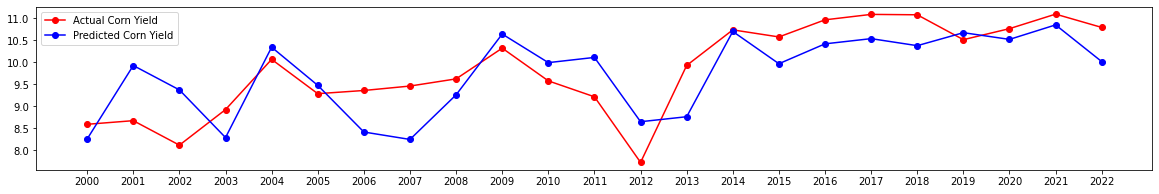

In [14]:
plt.rcParams["figure.figsize"] = (20,3)

plt.plot(bin_20_ndvi_predicted_corn['year'], bin_20_ndvi_predicted_corn['yield_corn'], color='red', marker='o', label='Actual Corn Yield')
plt.plot(bin_20_ndvi_predicted_corn['year'], bin_20_ndvi_predicted_corn['yield_corn_predicted'], color='blue', marker='o', label = 'Predicted Corn Yield')

plt.legend()
plt.xticks(np.arange(min(bin_20_ndvi_predicted_corn['year']), max(bin_20_ndvi_predicted_corn['year'])+1, 1.0))
plt.show()

In [15]:
#calculate RMSE
sqrt(mean_squared_error(bin_20_ndvi_predicted_corn['yield_corn'], bin_20_ndvi_predicted_corn['yield_corn_predicted']))

0.7140410281565184

## **ANN - SB Average MODIS**

In [16]:
predictions_sb = []

for year in all_years:
  print("YEAR ", year )
  test_df = modis_bins_20.loc[modis_bins_20['year'] == year]
  remaining_df = modis_bins_20.loc[(modis_bins_20.year != year)]
  

  # Separate Target Variable and Predictor Variables
  TargetVariable=['yield_soybean']
  Predictors = modis_day_cols + ['year']
  
  y_train = remaining_df[TargetVariable].values
  X_train = remaining_df[Predictors].values

  y_test = test_df[TargetVariable].values
  X_test = test_df[Predictors].values
  
  ### Sandardization of data ###
  PredictorScaler_train = StandardScaler()
  TargetVarScaler_train = StandardScaler()

  
  # Storing the fit object for later reference
  PredictorScalerFit_train = PredictorScaler_train.fit(X_train)
  TargetVarScalerFit_train = TargetVarScaler_train.fit(y_train)
  
  # Generating the standardized values of X and y
  X_train = PredictorScalerFit_train.transform(X_train)
  y_train = TargetVarScalerFit_train.transform(y_train)

  X_test = PredictorScalerFit_train.transform(X_test)
  y_test = TargetVarScalerFit_train.transform(y_test)
  
  # create ANN model
  model = Sequential()
  
  # Defining the Input layer and FIRST hidden layer, both are same!
  model.add(Dense(units=5, input_dim=281, kernel_initializer='normal', activation='relu'))
  
  # Defining the Second layer of the model
  # after the first layer we don't have to specify input_dim as keras configure it automatically
  model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
  
  # The output neuron is a single fully connected node 
  # Since we will be predicting a single number
  model.add(Dense(1, kernel_initializer='normal'))
  
  # Compiling the model
  model.compile(loss='mean_squared_error', optimizer='adam')
  
  # Fitting the ANN to the Training set
  model.fit(X_train, y_train ,batch_size = 5, epochs = 500, verbose=0)

  # Generating Predictions on testing data
  Predictions=model.predict(X_test)
  
  # Scaling the predicted Price data back to original price scale
  Predictions=TargetVarScalerFit_train.inverse_transform(Predictions)
  
  predictions_sb.append(Predictions[0][0])

YEAR  2000
1/1 [==============================] - 0s 63ms/step
YEAR  2001
1/1 [==============================] - 0s 47ms/step
YEAR  2002
1/1 [==============================] - 0s 48ms/step
YEAR  2003
1/1 [==============================] - 0s 47ms/step
YEAR  2004
1/1 [==============================] - 0s 44ms/step
YEAR  2005
1/1 [==============================] - 0s 46ms/step
YEAR  2006
1/1 [==============================] - 0s 45ms/step
YEAR  2007
1/1 [==============================] - 0s 53ms/step
YEAR  2008
1/1 [==============================] - 0s 46ms/step
YEAR  2009
1/1 [==============================] - 0s 47ms/step
YEAR  2010
1/1 [==============================] - 0s 47ms/step
YEAR  2011
1/1 [==============================] - 0s 48ms/step
YEAR  2012
1/1 [==============================] - 0s 45ms/step
YEAR  2013
1/1 [==============================] - 0s 45ms/step
YEAR  2014
1/1 [==============================] - 0s 45ms/step
YEAR  2015
1/1 [==============================] - 0s 46

In [17]:
bin_20_ndvi_predicted_sb = modis_bins_20.copy()
bin_20_ndvi_predicted_sb = bin_20_ndvi_predicted_sb[['year', 'yield_soybean']]
bin_20_ndvi_predicted_sb['yield_soybean_predicted'] = predictions_sb

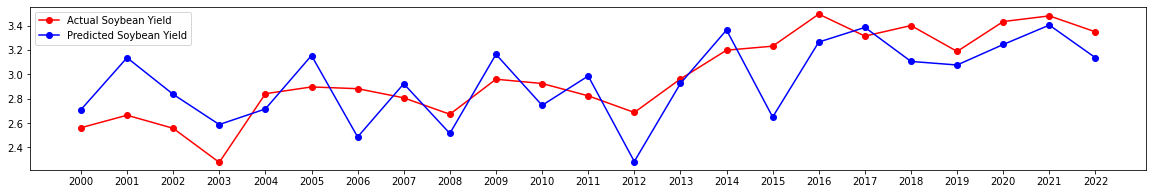

In [18]:
plt.rcParams["figure.figsize"] = (20,3)

plt.plot(bin_20_ndvi_predicted_sb['year'], bin_20_ndvi_predicted_sb['yield_soybean'], color='red', marker='o', label='Actual Soybean Yield')
plt.plot(bin_20_ndvi_predicted_sb['year'], bin_20_ndvi_predicted_sb['yield_soybean_predicted'], color='blue', marker='o', label = 'Predicted Soybean Yield')

plt.legend()
plt.xticks(np.arange(min(bin_20_ndvi_predicted_sb['year']), max(bin_20_ndvi_predicted_sb['year'])+1, 1.0))
plt.show()

In [19]:
#calculate RMSE
sqrt(mean_squared_error(bin_20_ndvi_predicted_sb['yield_soybean'], bin_20_ndvi_predicted_sb['yield_soybean_predicted']))

0.2611586192706826

## **ANN - Wheat Average MODIS**

In [20]:
predictions_wheat = []

for year in all_years:
  print("YEAR ", year )
  test_df = modis_bins_20.loc[modis_bins_20['year'] == year]
  remaining_df = modis_bins_20.loc[(modis_bins_20.year != year)]

  # Separate Target Variable and Predictor Variables
  TargetVariable=['yield_wheat']
  Predictors = modis_day_cols + ['year']
  
  y_train = remaining_df[TargetVariable].values
  X_train = remaining_df[Predictors].values

  y_test = test_df[TargetVariable].values
  X_test = test_df[Predictors].values
  
  ### Sandardization of data ###
  PredictorScaler_train = StandardScaler()
  TargetVarScaler_train = StandardScaler()
  
  # Storing the fit object for later reference
  PredictorScalerFit_train = PredictorScaler_train.fit(X_train)
  TargetVarScalerFit_train = TargetVarScaler_train.fit(y_train)

  # Generating the standardized values of X and y
  X_train = PredictorScalerFit_train.transform(X_train)
  y_train = TargetVarScalerFit_train.transform(y_train)

  X_test = PredictorScalerFit_train.transform(X_test)
  y_test = TargetVarScalerFit_train.transform(y_test)
  
  # create ANN model
  model = Sequential()
  
  # Defining the Input layer and FIRST hidden layer, both are same!
  model.add(Dense(units=5, input_dim=281, kernel_initializer='normal', activation='relu'))
  
  # Defining the Second layer of the model
  # after the first layer we don't have to specify input_dim as keras configure it automatically
  model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
  
  # The output neuron is a single fully connected node 
  # Since we will be predicting a single number
  model.add(Dense(1, kernel_initializer='normal'))
  
  # Compiling the model
  model.compile(loss='mean_squared_error', optimizer='adam')
  
  # Fitting the ANN to the Training set
  model.fit(X_train, y_train ,batch_size = 5, epochs = 500, verbose=0)

  # Generating Predictions on testing data
  Predictions=model.predict(X_test)
  
  # Scaling the predicted Price data back to original price scale
  Predictions=TargetVarScalerFit_train.inverse_transform(Predictions)
  
  predictions_wheat.append(Predictions[0][0])

YEAR  2000
1/1 [==============================] - 0s 77ms/step
YEAR  2001
1/1 [==============================] - 0s 47ms/step
YEAR  2002
1/1 [==============================] - 0s 111ms/step
YEAR  2003
1/1 [==============================] - 0s 52ms/step
YEAR  2004
1/1 [==============================] - 0s 50ms/step
YEAR  2005
1/1 [==============================] - 0s 45ms/step
YEAR  2006
1/1 [==============================] - 0s 53ms/step
YEAR  2007
1/1 [==============================] - 0s 56ms/step
YEAR  2008
1/1 [==============================] - 0s 53ms/step
YEAR  2009
1/1 [==============================] - 0s 47ms/step
YEAR  2010
1/1 [==============================] - 0s 51ms/step
YEAR  2011
1/1 [==============================] - 0s 54ms/step
YEAR  2012
1/1 [==============================] - 0s 45ms/step
YEAR  2013
1/1 [==============================] - 0s 45ms/step
YEAR  2014
1/1 [==============================] - 0s 48ms/step
YEAR  2015
1/1 [==============================] - 0s 4

In [21]:
bin_20_ndvi_predicted_wheat = modis_bins_20.copy()
bin_20_ndvi_predicted_wheat = bin_20_ndvi_predicted_wheat[['year', 'yield_wheat']]
bin_20_ndvi_predicted_wheat['yield_wheat_predicted'] = predictions_wheat

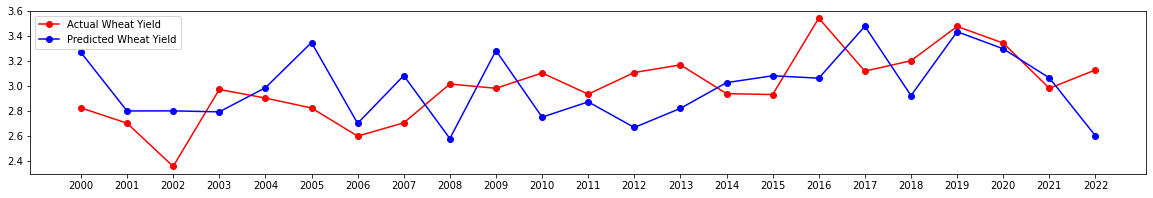

In [22]:
plt.plot(bin_20_ndvi_predicted_wheat['year'], bin_20_ndvi_predicted_wheat['yield_wheat'], color='red', marker='o', label='Actual Wheat Yield')
plt.plot(bin_20_ndvi_predicted_wheat['year'], bin_20_ndvi_predicted_wheat['yield_wheat_predicted'], color='blue', marker='o', label = 'Predicted Wheat Yield')

plt.legend()
plt.xticks(np.arange(min(bin_20_ndvi_predicted_wheat['year']), max(bin_20_ndvi_predicted_wheat['year'])+1, 1.0))
plt.show()

In [23]:
#calculate RMSE
sqrt(mean_squared_error(bin_20_ndvi_predicted_wheat['yield_wheat'], bin_20_ndvi_predicted_wheat['yield_wheat_predicted']))

0.3192145655413404